In [90]:
import math, numpy
#Part 1 input data: Air temp (degC), ID (W/sqm), load resistance (ohms)
# - split into training set and a randomly slected small validation set 
xdata = [[-10.0, 350, 4.464], 
  [-10.0, 650, 4.464], 
  [-10.0, 950, 4.464], 
  [-10.0, 1250, 4.464], 
  [10.0, 350, 4.464], 
  [10.0, 650, 4.464], 
  [10.0, 950, 4.464], 
  [10.0, 1250, 4.464], 
  [30.0, 350, 4.464], 
  [30.0, 650, 4.464], 
  [30.0, 950, 4.464], 
  [30.0, 1250, 4.464], 
  [-10.0, 350, 6.696], 
  [-10.0, 650, 6.696], 
  [-10.0, 950, 6.696], 
  [-10.0, 1250, 6.696], 
  [10.0, 350, 6.696], 
  [10.0, 650, 6.696], 
  [10.0, 950, 6.696], 
  [10.0, 1250, 6.696], 
  [30.0, 350, 6.696], 
  [30.0, 650, 6.696], 
  [30.0, 950, 6.696], 
  [30.0, 1250, 6.696], 
  [-10.0, 350, 8.928], 
  [-10.0, 650, 8.928], 
  [-10.0, 950, 8.928], 
  [-10.0, 1250, 8.928], 
  [10.0, 350, 8.928], 
  [10.0, 650, 8.928], 
  [10.0, 950, 8.928], 
  [10.0, 1250, 8.928], 
  [30.0, 350, 8.928], 
  [30.0, 650, 8.928], 
  [30.0, 950, 8.928], 
  [30.0, 1250, 8.928]] 


#Part 1 output data: VL (V) and Power out (W)
ydata = [[18.9, 80.3], 
 [23.5, 124.6], 
 [24.8, 138.6], 
 [25.6, 146.9], 
 [19.2, 83.1], 
 [25.0, 140.5], 
 [26.5, 157.6], 
 [27.3, 167.5],  
 [19.4, 84.7], 
 [26.4, 156.7], 
 [28.1, 177.7], 
 [29.0, 189.4],
 [22.4, 75.2], 
 [24.8, 92.2], 
 [25.8, 99.7], 
 [26.4, 104.6], 
 [23.6, 83.7], 
 [26.5, 104.9], 
 [27.6, 113.8], 
 [28.3, 119.6], 
 [24.8, 92.0], 
 [28.1, 118.2], 
 [29.3, 128.8], 
 [30.1, 135.5],  
 [23.5, 62.2], 
 [25.4, 72.5], 
 [26.3, 77.6], 
 [26.9, 81.1],  
 [25.0, 70.3], 
 [27.1, 82.7], 
 [28.1, 88.7], 
 [28.7, 92.8],  
 [26.5, 78.6], 
 [28.8, 93.5], 
 [29.9, 100.5], 
 [30.6, 105.2]] 


xarray= numpy.array(xdata)
yarray= numpy.array(ydata)
# print (xdata)
# print (xarray)
# print (ydata)
# print (yarray)

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
x_df = pd.DataFrame(xarray, columns=["air_temp", "load_resistance", "i_d"])
x_df

,air_temp,load_resistance,i_d
0,-10.0,350.0,4.464
1,-10.0,650.0,4.464
2,-10.0,950.0,4.464
3,-10.0,1250.0,4.464
4,10.0,350.0,4.464
5,10.0,650.0,4.464
6,10.0,950.0,4.464
7,10.0,1250.0,4.464
8,30.0,350.0,4.464
9,30.0,650.0,4.464


In [75]:
y_df = pd.DataFrame(yarray, columns=["output_voltage", "power_output"])
y_df

,output_voltage,power_output
0,18.9,80.3
1,23.5,124.6
2,24.8,138.6
3,25.6,146.9
4,19.2,83.1
5,25.0,140.5
6,26.5,157.6
7,27.3,167.5
8,19.4,84.7
9,26.4,156.7


In [76]:
data_df = pd.merge(x_df, y_df, left_index=True, right_index=True)
data_df.to_csv('task1.1data.csv', index=False)

## Mean & Standard Deviation

In [77]:
x_df.describe()

,air_temp,load_resistance,i_d
count,36.000000,36.000000,36.000000
mean,10.000000,800.000000,6.696000
std,16.561573,340.168026,1.848272
min,-10.000000,350.000000,4.464000
25%,-10.000000,575.000000,4.464000
50%,10.000000,800.000000,6.696000
75%,30.000000,1025.000000,8.928000
max,30.000000,1250.000000,8.928000


### Mean

In [78]:
mean_values = x_df.mean()
mean_values

air_temp            10.000
load_resistance    800.000
i_d                  6.696
dtype: float64

In [79]:
air_temp_mean = mean_values[0]
load_resistance_mean = mean_values[1]
i_d_mean = mean_values[2]

### Standard Deviation

In [80]:
std_values = x_df.std()
std_values

air_temp            16.561573
load_resistance    340.168026
i_d                  1.848272
dtype: float64

In [81]:
air_temp_std = std_values[0]
load_resistance_std = std_values[1]
i_d_std = std_values[2]

## Standardising the dataset

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
scaled_x_data = scaler.fit_transform(x_df)

In [84]:
scaled_x_df = pd.DataFrame(scaled_x_data, columns=x_df.columns)
scaled_x_df

,air_temp,load_resistance,i_d
0,-1.224745,-1.341641,-1.224745e+00
1,-1.224745,-0.447214,-1.224745e+00
2,-1.224745,0.447214,-1.224745e+00
3,-1.224745,1.341641,-1.224745e+00
4,0.000000,-1.341641,-1.224745e+00
5,0.000000,-0.447214,-1.224745e+00
6,0.000000,0.447214,-1.224745e+00
7,0.000000,1.341641,-1.224745e+00
8,1.224745,-1.341641,-1.224745e+00
9,1.224745,-0.447214,-1.224745e+00


# (b) PCA

In [85]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf

## Covariance Matrix


In [86]:
x_data_cov = scaled_x_df.cov()
x_data_cov

,air_temp,load_resistance,i_d
air_temp,1.028571,0.000000,0.000000
load_resistance,0.000000,1.028571,0.000000
i_d,0.000000,0.000000,1.028571


## Eigenvalues

In [63]:
#w = eigenvalues
#v = eigenvectors
w, v = LA.eig(x_data_cov)
print(w)
print(v)

[1.02857143 1.02857143 1.02857143]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [64]:
type(scaled_x_df['air_temp'])

pandas.core.series.Series

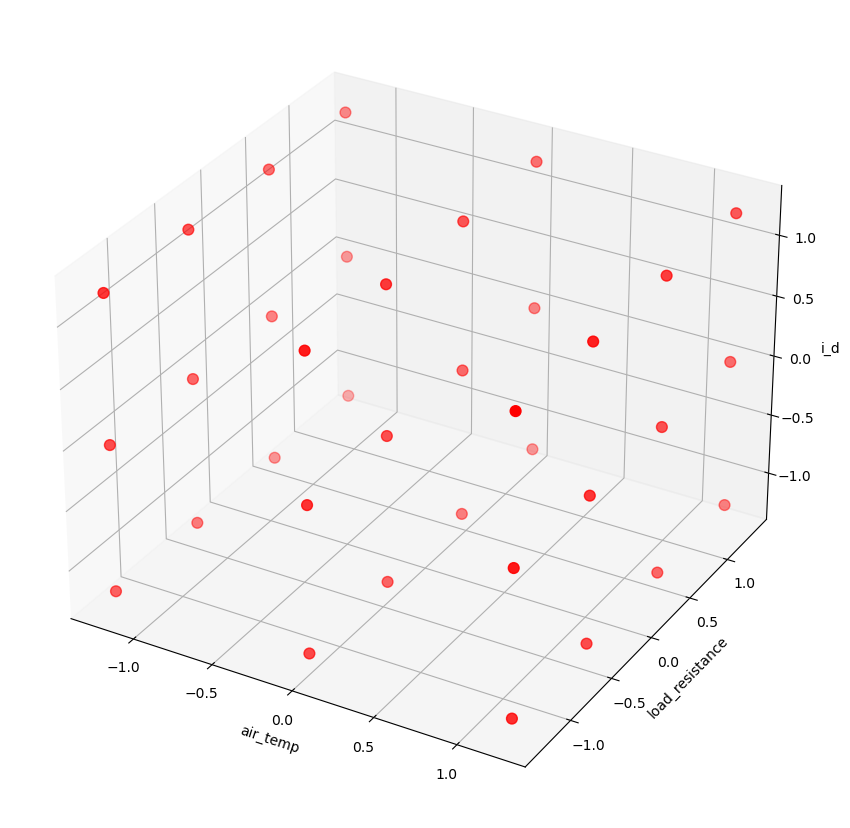

In [65]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(18.5, 10.5)

x = scaled_x_df['air_temp']
y = scaled_x_df['load_resistance'] 
z= scaled_x_df['i_d']

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='red', s=60)

ax.set_xlabel('air_temp')
ax.set_ylabel('load_resistance')
ax.set_zlabel('i_d');
plt.show()

The relative importance of each variable cannot be inferred from the 3D plot. However, 